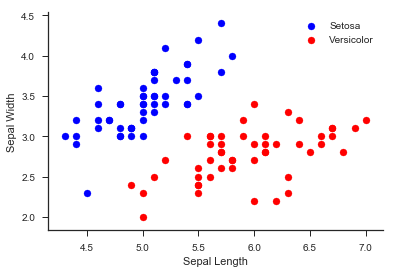

In [40]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
%matplotlib inline
sns.set(style = 'ticks' , palette = 'Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division

data = datasets.load_iris()
X = data.data[:100,:2]
y = data.target[:100]
X_full= data.data[:100,:]

setosa = plt.scatter(X[:50,0], X[:50,1],c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1],c='r')
plt.legend((setosa,versicolor) , ("Setosa","Versicolor"))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
sns.despine()

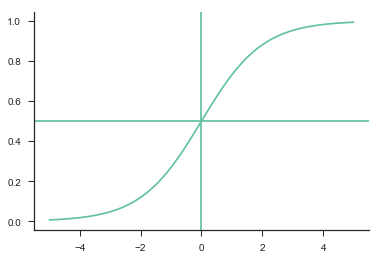

In [41]:
x_val = np.linspace(-5,5,100)
y_val = [1/(1+math.e**(-x)) for x in x_val]
plt.plot(x_val,y_val)
plt.axhline(0.5)
plt.axvline(0)
sns.despine()

In [65]:
def logistic_func(b,x):
    return float(1)/(1+math.e**(-x.dot(b))) #f(x)

def log_gradient(b,x,y):
    first_calc = logistic_func(b,x) - np.squeeze(y) #-[yi - fxi] Squeeze se [[1]] --> [1] ye hota hai
    final_calc = first_calc.T.dot(x) #(yi-fxi)*xi
    return final_calc

def cost_func(b,x,y): #l(b)
    log_func_v = logistic_func(b,x)
    stp1 = y*np.log(log_func_v) #yi*log(fxi)
    stp2 = (1-y)*np.log(1-log_func_v) #(1-y)*(1-log(fxi))
    final = -stp1 - stp2
    return np.mean(final)

def grad_desc(b_vals, X, y, lr = 0.001, converge_change = 0.001):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    b_list = []
    cost = cost_func(b_vals,X,y)
    cost_iter.append([0,cost])
    change_cost = converge_change+1
    i = 1
    while(change_cost>converge_change):
        old_cost = cost
        b_list.append(b_vals)
        b_vals = b_vals - (lr*log_gradient(b_vals,X,y))
        cost = cost_func(b_vals,X,y)
        cost_iter.append([i,cost])
        change_cost = old_cost-cost
        i+=1
    return b_vals, np.array(cost_iter), b_list

def pred_values(b,X,hard =True):
    pred_prob = logistic_func(b,X)
    pred_value = np.where(pred_prob>=0.5,1,0)
    if(hard):
        return pred_value
    return pred_prob

In [66]:
shape = X.shape[1]
y_flip = np.logical_not(y)
betas = np.zeros(shape)
fitted_vals, cost_iter, b_list = grad_desc(betas, X, y_flip, lr = 0.001, converge_change = 0.001)
print(fitted_vals)

[-1.18974362  2.08100246]


In [67]:
cost_iter

array([[  0.        ,   0.69314718],
       [  1.        ,   0.68590007],
       [  2.        ,   0.67952028],
       [  3.        ,   0.67324189],
       [  4.        ,   0.66706323],
       [  5.        ,   0.66098267],
       [  6.        ,   0.65499858],
       [  7.        ,   0.64910933],
       [  8.        ,   0.64331334],
       [  9.        ,   0.63760902],
       [ 10.        ,   0.63199479],
       [ 11.        ,   0.6264691 ],
       [ 12.        ,   0.62103042],
       [ 13.        ,   0.61567722],
       [ 14.        ,   0.61040801],
       [ 15.        ,   0.6052213 ],
       [ 16.        ,   0.60011563],
       [ 17.        ,   0.59508955],
       [ 18.        ,   0.59014163],
       [ 19.        ,   0.58527048],
       [ 20.        ,   0.5804747 ],
       [ 21.        ,   0.57575293],
       [ 22.        ,   0.57110383],
       [ 23.        ,   0.56652607],
       [ 24.        ,   0.56201834],
       [ 25.        ,   0.55757937],
       [ 26.        ,   0.5532079 ],
 

In [68]:
predicted_y = pred_values(fitted_vals, X)
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
np.sum(y_flip == predicted_y)

99

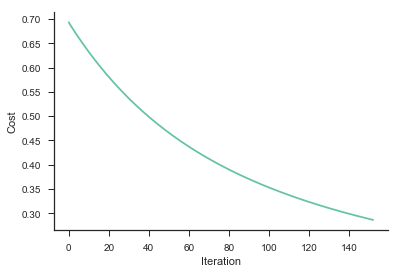

In [73]:
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()

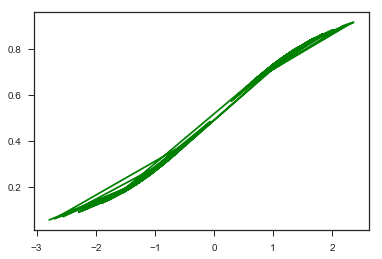

In [72]:
plt.plot(X.dot(b_list[-1]),logistic_func(b_list[-1],X),color = 'g')

In [70]:
def sigmoid_anim(X,y,b_list):
    fig = plt.figure()
    ax = fig.gca()
    t = []
    t.append(X)
    t = tuple(t)
    b = b_list[0]
    ax.scatter(X.dot(b_list[-1]),np.zeros(100))
    sig, = ax.plot(X.dot(b),logistic_func(b,X),color = 'g')
    def update(b):
        sig.set_data(X.dot(b),logistic_func(b,X))
        return sig

    fig.canvas.draw()
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=b_list, blit=False, interval=10 )
    plt.show()

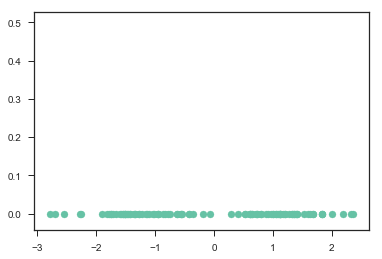

In [60]:
sigmoid_anim(X,y_flip,b_list)

In [52]:
print(X.dot(b_list[1]))

[-0.061875 -0.065325 -0.057435 -0.05673  -0.05793  -0.06237  -0.05187
 -0.06117  -0.05532  -0.063705 -0.06561  -0.05652  -0.063    -0.051375
 -0.07005  -0.061245 -0.06237  -0.061875 -0.070965 -0.057015 -0.07047
 -0.058635 -0.04863  -0.065115 -0.05652  -0.06765  -0.06117  -0.0642
 -0.06582  -0.057435 -0.06138  -0.07047  -0.05448  -0.059835 -0.063705
 -0.06441  -0.071175 -0.063705 -0.0537   -0.063495 -0.05955  -0.067365
 -0.05046  -0.05955  -0.057015 -0.063    -0.057015 -0.05511  -0.063285
 -0.06279  -0.11091  -0.09696  -0.110205 -0.090615 -0.105765 -0.087165
 -0.093015 -0.075045 -0.10647  -0.07716  -0.08385  -0.088575 -0.10386
 -0.094845 -0.08322  -0.105555 -0.0816   -0.09111  -0.10851  -0.0897
 -0.085335 -0.096465 -0.105975 -0.096465 -0.10182  -0.10485  -0.11274
 -0.107175 -0.09252  -0.090405 -0.088995 -0.088995 -0.09111  -0.09576
 -0.07695  -0.08442  -0.105555 -0.109215 -0.0816   -0.087375 -0.085755
 -0.093225 -0.09273  -0.07899  -0.08646  -0.083925 -0.085545 -0.09717
 -0.078075 -0.08

In [75]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y_flip)
sum(y_flip == logreg.predict(X))

99